

---


#  🟢 **Disciplina CAT314** - Ferramentas de Previsão de Curtíssimo Prazo (nowcasting)


---






## **Aula Prática 2**: $\underline{Plotando\ Imagem\ de\ Satélite}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como plotar imagens de satélite do canal infravermelho. Para isto usaremos os dados do sensor [Advanced Baseline Imager (ABI)](https://space.oscar.wmo.int/instruments/view/abi) do satélite [Geostationary Operational Environmental Satellite (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16).

---


**DADOS DE ENTRADA**: Serão utilizados os dados do sensor ABI da NOAA.

1. $\underline{Dados\ de\ Tempertura\ de\ Brilho}$: sensor ABI do satélite GOES-16
- **Tipo do dado:** matriz
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** OR_ABI-L2-CMIPF-M6C01_G16_s20220090940205_e20220090949513_c20220090949586.nc
- **Fonte dos dados:** FTP do [Amazon](https://noaa-goes16.s3.amazonaws.com/index.html#ABI-L2-CMIPF/)


---

**DADOS DE SAÍDA:** Figuras de temperatura de brilho
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. script_1_2024-04-30_13_00_UTC.png
    2. script_2_2024-04-30_13:00_UTC.png
    3. script_3_2024-04-30_13:00_UTC.png
    4. script_4_2024-04-30_13_00_UTC.jpg
    

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   **1° Passo:** Preparando o Ambiente
2.   **Script 01** - Projeção Satélite e Imagem em Níveis de Cinza
3.   **Script 02** - Projeção Satélite e Imagem com Realce
4.   **Script 03** - Projeção Retangular e Imagem em Níveis de Cinza
5.   **Script 04** - Projeção Retangular com Realce


---
**OBSERVAÇÕES IMPORTANTES**:
1. Esse código foi construído baseado no minicurso de Nowcasting ministrado na Confererência Pan-Americana de Meteorologia (CPAM) em agosto de 2024.

---
- **Realizado por:** Diego Souza/INPE e Enrique V. Mattos - 19/08/2024
- **Atualizado por:** Enrique V. Mattos - 01/09/2025


---

# **1° Passo:** Preparando o Ambiente

## **a) Instalando as Bibliotecas Necessárias**


Neste passo instalaremos as bibliotecas necessárias (e suas dependências) para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **Netcdf4 e Xarray:** Ler os dados de arquivos no formato NetCDF
*   **Cartopy:** Adicionar mapas aos plots
*   **Boto3:** Download de dados GOES-16 diretamente da nuvem - Amazon Web Services (AWS)
*   **GDAL:** Reprojeção de imagens GOES-16
*   **Salem:** Mascaramento

In [ ]:
!pip install -q cartopy boto3 gdal salem rasterio pyproj geopandas descartes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.6 MB/s eta 0:00:00


## **b) Download de Arquivos Auxiliares**

Neste passo vamos baixar alguns arquivos auxiliares necessários para parte dos scripts que serão demonstrados no curso:

*   **utilities.py:** Script com algumas funções para processamento de dados de satélite
*   **ir.cpt:** Paleta de cores para o canal do infravermelhos do GOES-16

In [ ]:
# importa biblioteca que contabiliza o tempo de processamento
import time

# Download do arquivo "utilities.py"
!wget -c https://github.com/evmpython/CAT314_UNIFEI_2024/raw/main/utils/utilities.py

# Download da paleta de cores para o canal do infravermelho
!wget -c https://github.com/evmpython/CAT314_UNIFEI_2024/raw/main/utils/ir.cpt

--2025-09-01 16:58:18--  https://github.com/evmpython/CAT314_UNIFEI_2024/raw/main/utils/utilities.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT314_UNIFEI_2024/main/utils/utilities.py [following]
--2025-09-01 16:58:18--  https://raw.githubusercontent.com/evmpython/CAT314_UNIFEI_2024/main/utils/utilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17330 (17K) [text/plain]
Saving to: ‘utilities.py’

utilities.py        100%[===================>]  16.92K  --.-KB/s    in 0s      

2025-09-01 16:58:18 (126 MB/s) - ‘utilities.py’ saved [17330/17330]

--2025-09-01 16:58:18--  h

#**Script 01** - Projeção Satélite e Imagem em Níveis de Cinza



Neste primeiro script vamos acessar e processar um arquivo NetCDF do sensor ABI do satélite GOES-16 e visualizar a imagem na projeção original (conhecida como projeção "GOES-R" ou "satélite"). Temos basicamente 5 "blocos" de código:

**1. Importação das bibliotecas necessárias**

**2. Criação de diretórios de entrada e saída de dados**

**3. Download de dados do sensor ABI do GOES-16**

**4. Leitura do aquivo NetCDF do sensor ABI**

**5. Criação da figura**

O que podemos modificar facilmente?

**1. Data e hora do arquivo a ser baixado**

**2. Qual canal ABI desejamos baixar**

**3. Escala de cores ([colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) padrão da matplotlib), título, entre outras decorações da imagem**

File /content/input/OR_ABI-L2-CMIPF-M6C13_G16_s20241211300205_e20241211309524_c20241211309588.nc exists


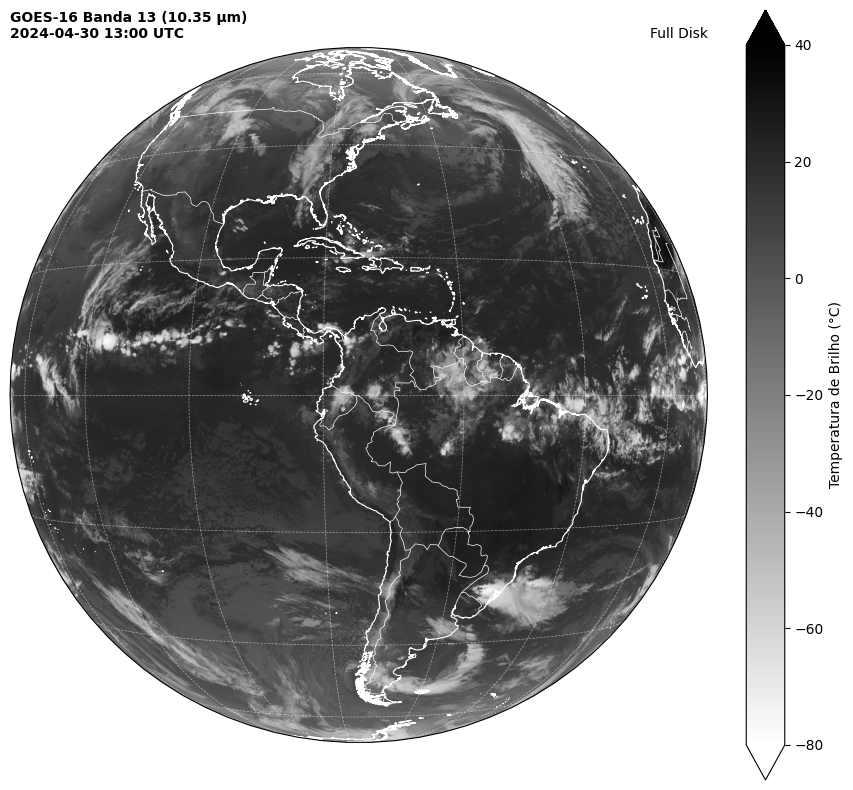

CPU times: user 14.3 s, sys: 4.43 s, total: 18.8 s
Wall time: 19.6 s


In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
from datetime import datetime
from utilities import download_CMI
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = "/content/output"; os.makedirs(output, exist_ok=True)

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202404301300'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                               LEITURA DO ARQUIVO
#========================================================================================================================#
# abre a imagem
data = xr.open_dataset(path)

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# usa a projeção geoestacionária do cartopy
# para o GOES-16: longitude central: -75.0 / altura do satellite: 35786023.0
# a extensão do Full Disk: (metade dos pixels full disk) X (tamanho do pixel em radianos) X (altura do satélite em metros) => 2712 * 0.000056 * 35786023.0 = 5434894.67527
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527, 5434894.67527, -5434894.67527, 5434894.67527)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# escala de cores
colormap = "gray_r" # escala de cores na ordem reversa - branco para preto para o canal do IR

# plota imagem
img = ax.imshow(data['CMI'] - 273.15, origin='upper', vmin=-80, vmax=40, extent=img_extent, cmap=colormap)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/script_1_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

#**Script 02** - Projeção Satélite e Imagem com Realce

File /content/input/OR_ABI-L2-CMIPF-M6C13_G16_s20241211300205_e20241211309524_c20241211309588.nc exists


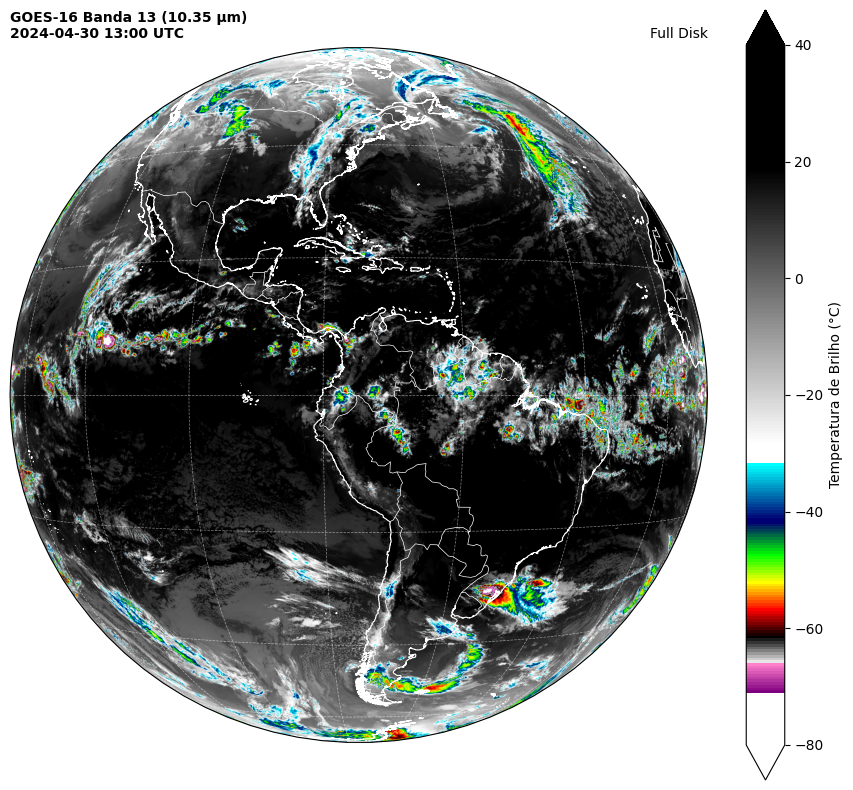

CPU times: user 13.6 s, sys: 4.29 s, total: 17.9 s
Wall time: 18.1 s


In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
from datetime import datetime
from matplotlib import cm
from utilities import download_CMI, loadCPT
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = "/content/output"; os.makedirs(output, exist_ok=True)

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202404301300'
#yyyymmddhhmn = '202406301800'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                               LEITURA DO ARQUIVO
#========================================================================================================================#
# abre a imagem
data = xr.open_dataset(path)

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# usa a projeção geoestacionária do cartopy
# para o GOES-16: longitude central: -75.0 / altura do satellite: 35786023.0
# a extensão do Full Disk: (metade dos pixels full disk) X (tamanho do pixel em radianos) X (altura do satélite em metros) => 2712 * 0.000056 * 35786023.0 = 5434894.67527
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527, 5434894.67527, -5434894.67527, 5434894.67527)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# plota imagem
img = ax.imshow(data['CMI'] - 273.15, origin='upper', vmin=-80, vmax=40, extent=img_extent, cmap=colormap)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/script_2_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

#**Script 03** - Projeção Retangular e Imagem em Níveis de Cinza


Neste segundo script vamos reprojetar a imagem ABI, da projeção GOES-R para a projeção "cilíndrica equidistante" utilizando uma função chamada "remap", que utiliza a biblioteca GDAL (https://gdal.org/api/python_bindings.html). O dado reprojetado será visualizado em escala de cinza invertida (branco para temperaturas de brilho mais baixas e preto para temperaturas de brilho mais altas).

O que podemos modificar facilmente?

**1. A região desejada (variável "extent")**

File /content/input/OR_ABI-L2-CMIPF-M6C13_G16_s20241211300205_e20241211309524_c20241211309588.nc exists
Remapping...
Remap finished! Time: 0.37 seconds


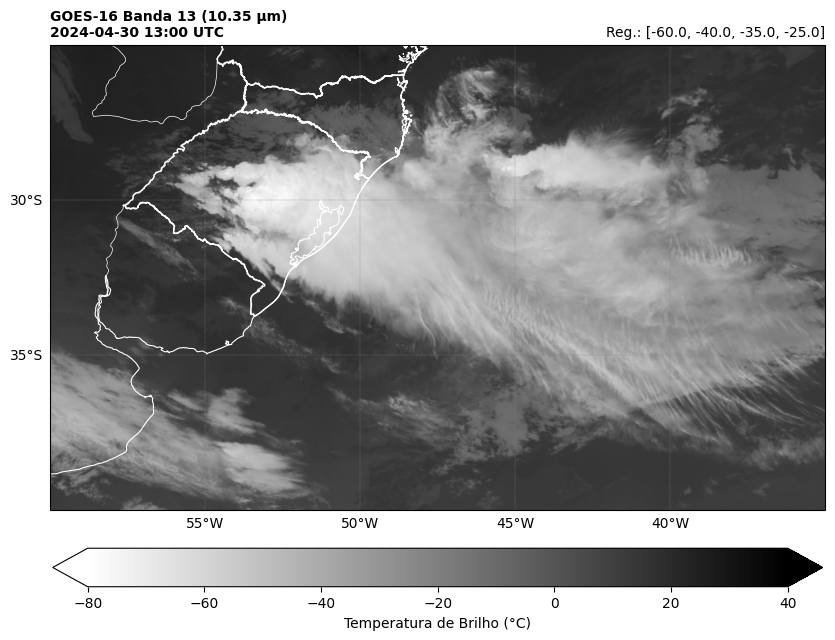

CPU times: user 8.65 s, sys: 405 ms, total: 9.05 s
Wall time: 9.92 s


In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import datetime
from utilities import download_CMI, remap
import numpy as np
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = "/content/output"; os.makedirs(output, exist_ok=True)

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202404301300'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                         REPROJETA E FAZ A LEITURA DO ARQUIVO
#========================================================================================================================#
# área desejada (min lon, min lat, max lon, max lat)
extent = [-60.00, -40.00, -35.00, -25.00]

# chama a função que faz a reprojeção (file, variable, extent, resolution)
grid = remap(path, 'CMI', extent, 2)

# leitura do dado e transforma para °C
data = grid.ReadAsArray() - 273.15

#========================================================================================================================#
#                                                 PLOT THE IMAGE
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# projeção geoestacionária do cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# define a extensão da imagem
img_extent = [extent[0], extent[2], extent[1], extent[3]] # Min lon, Max lon, Min lat, Max lat

# escala de cores
colormap = "gray_r" # escala de cores na ordem reversa - branco para preto para o canal do IR

# plota imagem
img = ax.imshow(data, origin='upper', vmin=-80, vmax=40, extent=img_extent, cmap=colormap)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# plota estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT314_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=1.0)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(xr.open_dataset(path).time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/script_3_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

#**Script 04** - Projeção Retangular com Realce


Neste terceiro script vamos reprojetar a imagem e visualizá-la em escala colorida, realçando a imagem IR. Para isso, vamos utilizar a função **"loadCPT"**, criada para carregar uma paleta de cores no formato de arquivo ".cpt". Podemos acessar dezenas de escalas neste formato na seguinte página: http://seaviewsensing.com/pub/cpt-city/

Remapping...
Remap finished! Time: 0.42 seconds


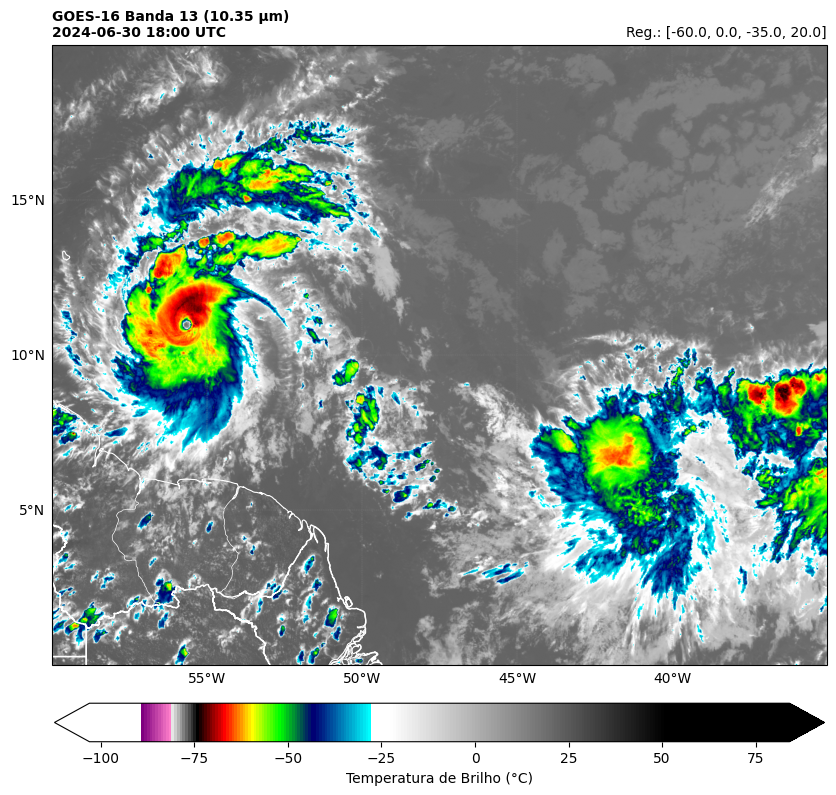

CPU times: user 9.27 s, sys: 533 ms, total: 9.8 s
Wall time: 10.2 s


In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import datetime
from utilities import download_CMI, remap, loadCPT
import numpy as np
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = "/content/output"; os.makedirs(output, exist_ok=True)

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
#yyyymmddhhmn = '202404301300'
yyyymmddhhmn = '202406301800'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                         REPROJETA E FAZ A LEITURA DO ARQUIVO
#========================================================================================================================#
# área desejada (min lon, min lat, max lon, max lat)
extent = [-60.00, -40.00, -35.00, -25.00]
extent = [-60.00, 0.00, -35.00, 20.00]

# chama a função que faz a reprojeção (file, variable, extent, resolution)
grid = remap(path, 'CMI', extent, 2)

# leitura do dado e transforma para °C
data = grid.ReadAsArray() - 273.15

#========================================================================================================================#
#                                                 PLOT THE IMAGE
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# projeção geoestacionária do cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# define a extensão da imagem
img_extent = [extent[0], extent[2], extent[1], extent[3]] # Min lon, Max lon, Min lat, Max lat

# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# plota imagem
img = ax.imshow(data, origin='upper', vmin=-103.0, vmax=84, extent=img_extent, cmap=colormap)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# plota estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT314_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=1.0)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(xr.open_dataset(path).time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/script_4_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()